<a href="https://colab.research.google.com/github/Prathyush-Kumar/Machine-Learning/blob/main/Data%20testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!pip install matplotlib scikit-learn pandas -q

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

iris = load_iris()
x = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target)
print(x)
print(y)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [28]:
print("the first 5 rows of the dataset \n",x.head())
print("\nTarget classes: ",iris.target_names)

the first 5 rows of the dataset 
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Target classes:  ['setosa' 'versicolor' 'virginica']


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred = model.predict(x_test)
print("\nClassification Report:\n",classification_report(y_test,y_pred,target_names=iris.target_names))


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



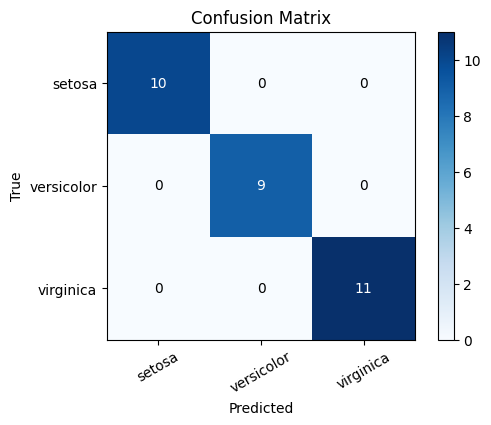

In [44]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = range(len(iris.target_names))
plt.xticks(tick_marks,iris.target_names,rotation=30)
plt.yticks(tick_marks,iris.target_names)
thresh = cm.max()/2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j,i,cm[i,j],ha="center",va="center",color="white" if cm[i,j]>thresh else "black")

plt.xlabel('Predicted')
plt.ylabel("True")
plt.show()